In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

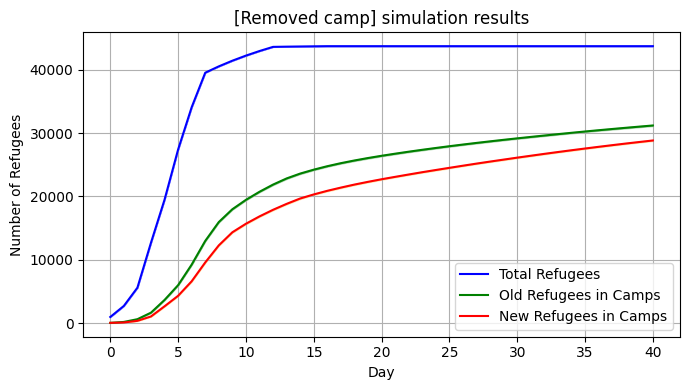

In [5]:
# Get all simulation files from base
file_paths = sorted(glob.glob("../base/runsL/out*.csv"))

total_refugees_runs = []
camp_refugees_runs = []

for file in file_paths:
    df = pd.read_csv(file)
    total_refugees_runs.append(df["total refugees (simulation)"])
    camp_refugees_runs.append(df["refugees in camps (simulation)"])

total_df = pd.concat(total_refugees_runs, axis=1)
camp_df = pd.concat(camp_refugees_runs, axis=1)

mean_total = total_df.mean(axis=1)
std_total = total_df.std(axis=1)

mean_camp = camp_df.mean(axis=1)
std_camp = camp_df.std(axis=1)

time = pd.read_csv(file_paths[0])["Day"]

plt.figure(figsize=(7, 4))

plt.plot(time, mean_total, label="Total Refugees", color='blue')
plt.fill_between(time, mean_total - std_total, mean_total + std_total, alpha=0.3, color='blue')

plt.plot(time, mean_camp, label="Old Refugees in Camps", color='green')
plt.fill_between(time, mean_camp - std_camp, mean_camp + std_camp, alpha=0.3, color='green')


# Get all simulation files from this directory
file_paths = sorted(glob.glob("runsML/out*.csv"))

total_refugees_runs = []
camp_refugees_runs = []

for file in file_paths:
    df = pd.read_csv(file)
    total_refugees_runs.append(df["total refugees (simulation)"])
    camp_refugees_runs.append(df["refugees in camps (simulation)"])

total_df = pd.concat(total_refugees_runs, axis=1)
camp_df = pd.concat(camp_refugees_runs, axis=1)

mean_total = total_df.mean(axis=1)
std_total = total_df.std(axis=1)

mean_camp = camp_df.mean(axis=1)
std_camp = camp_df.std(axis=1)

time = pd.read_csv(file_paths[0])["Day"]
plt.plot(time, mean_camp, label="New Refugees in Camps", color='red')
plt.fill_between(time, mean_camp - std_camp, mean_camp + std_camp, alpha=0.3, color='orange')

plt.xlabel("Day")
plt.ylabel("Number of Refugees")
plt.title("[Removed camp] simulation results")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




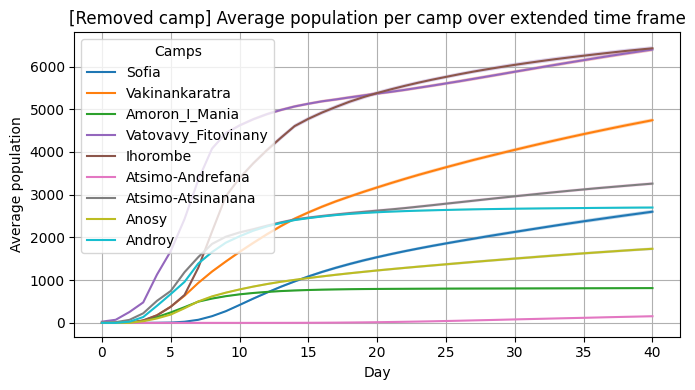

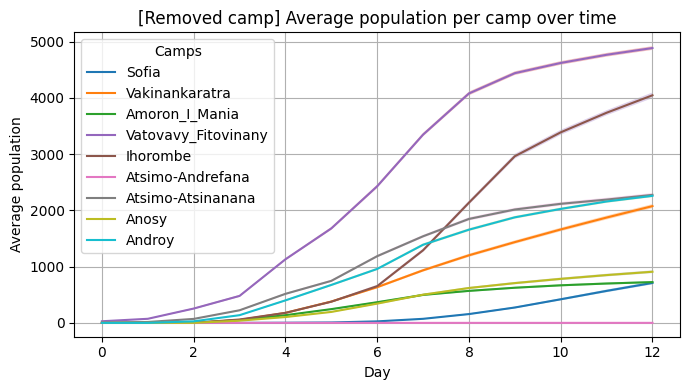

In [6]:
file_paths = sorted(glob.glob("runsML/out*.csv"))

example_df = pd.read_csv(file_paths[0])
camp_sim_cols = [col for col in example_df.columns if col.startswith("Camp_") and col.endswith("sim")]

camp_sim_runs = []
for file in file_paths:
    df = pd.read_csv(file)
    camp_sim_runs.append(df[camp_sim_cols])

n_runs = len(camp_sim_runs)
n_days = len(camp_sim_runs[0])
n_camps = len(camp_sim_cols)

data_array = np.stack([df.values for df in camp_sim_runs])

mean_data = data_array.mean(axis=0)
std_data = data_array.std(axis=0)

mean_df = pd.DataFrame(mean_data, columns=[col.replace("Camp_", "").replace(" sim", "") for col in camp_sim_cols])
std_df = pd.DataFrame(std_data, columns=mean_df.columns)

plt.figure(figsize=(7, 4))

colors = ['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for i, camp in enumerate(mean_df.columns):
    plt.plot(mean_df.index, mean_df[camp], label=camp, color=colors[i])
    plt.fill_between(
        mean_df.index,
        mean_df[camp] - std_df[camp],
        mean_df[camp] + std_df[camp],
        alpha=0.3
    )

plt.xlabel("Day")
plt.ylabel("Average population")
plt.title("[Removed camp] Average population per camp over extended time frame")
plt.legend(title="Camps", loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
for i, camp in enumerate(mean_df.columns):
    plt.plot(mean_df.index[:13], mean_df[camp][:13], label=camp, color=colors[i])
    plt.fill_between(
        mean_df.index[:13],
        mean_df[camp][:13] - std_df[camp][:13],
        mean_df[camp][:13] + std_df[camp][:13],
        alpha=0.3
    )

plt.xlabel("Day")
plt.ylabel("Average population")
plt.title("[Removed camp] Average population per camp over time")
plt.legend(title="Camps", loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
